# ___

# [ Machine Learning in Geosciences ]

## **Test 1 solution** 

*Author: Jakub Zapletal*

*Date: 07-04-2025* 

___


### 1.1 The Problem

TASK: Predict Forest Fires using Meteorological Data

Context: "Forest fires are a major environmental issue, creating economical and ecological damage while endangering human lives. Fast detection is a key element for controlling such phenomenon. To achieve this, one alternative is to use automatic tools based on local sensors, such as provided by meteorological stations. In effect, meteorological conditions (e.g. temperature, wind) are known to influence forest fires and several fire indexes, such as the forest Fire Weather Index (FWI), you can use such features, see below the figure for feature engineering. 
In this work, we explore a Machine Learning (ML) approach to **predict the burned area of forest fires**.


### 1.2 Assumptions

* The problem is a multivariate regression (will use multiple features to make a prediction); 
* There is no continuous flow of data, hence batch learning shall be applied; 
* The meterological data are good indicators of the forest fire; 
* There are enough variables (features) to predict the forest fire.


### 1.3 Expected results 

* Machine Learning model to predict the burned area of the forest fires based on the meterological data. 
___    

### Input data atrributes description

**Attribute information**

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 


![Forest Fire Prediction](./data/img.png)


In [28]:
# input libs
import pandas as pd
from os.path import join, dirname
import os
import sys
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import ensemble, metrics, model_selection, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Data preprocessing
Load the data

In [3]:
# Input data 
data_path = './data/forestfires.csv'


In [4]:
df_forestfires = pd.read_csv(data_path)


In [5]:
# replace month names with numbers
df_forestfires['month'].unique()
df_forestfires['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

Converting categorical values from DataFrame to numerical (days and months)

In [6]:
dict_month = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
dict_days = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

df_forestfires['month'] = df_forestfires['month'].map(dict_month)
df_forestfires['day'] = df_forestfires['day'].map(dict_days)


In [7]:
df_forestfires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


All attributes have numerical data type

In [8]:
df_forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [9]:
# check if nan values are present
for col in enumerate(df_forestfires.columns):
    count_nans = df_forestfires[col[1]].isna().sum()
    print(f'{col[1]}: {count_nans}')

X: 0
Y: 0
month: 0
day: 0
FFMC: 0
DMC: 0
DC: 0
ISI: 0
temp: 0
RH: 0
wind: 0
rain: 0
area: 0


X
Y
month
day
FFMC
DMC
DC
ISI
temp
RH
wind
rain
area


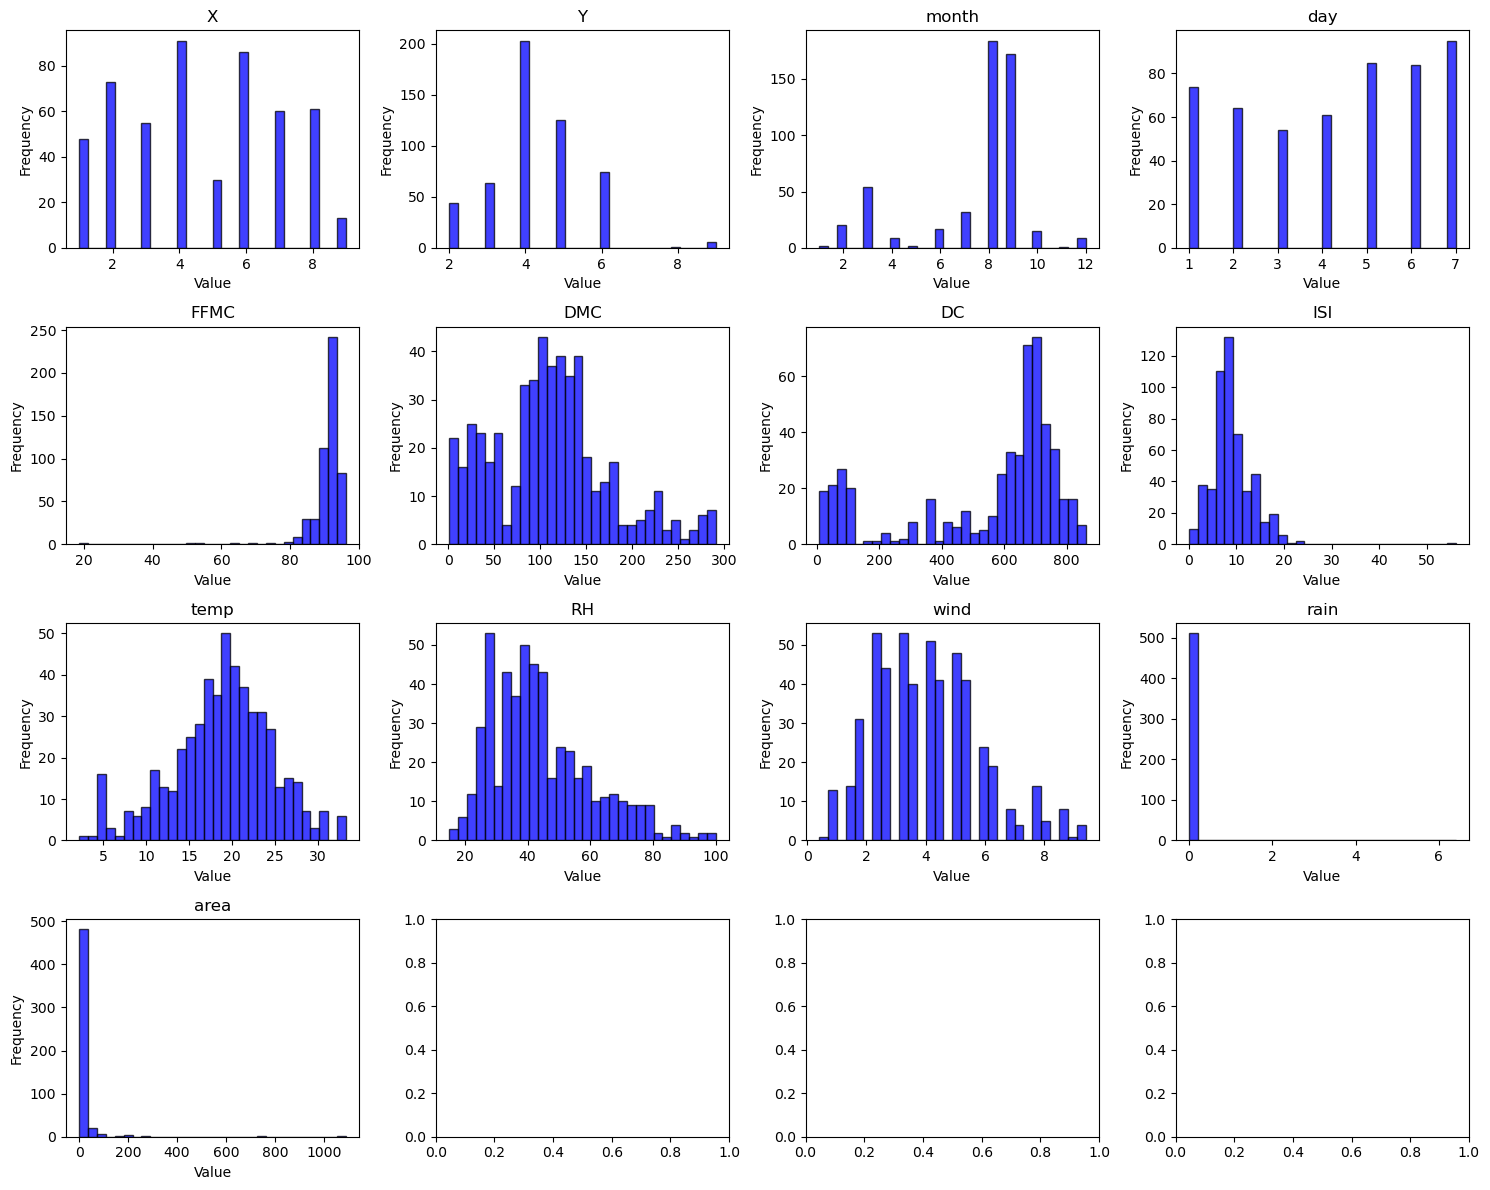

In [10]:
# Plot histograms for each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(df_forestfires.columns):
    print(col)
    axes[i].hist(df_forestfires[col], bins=30, alpha=0.75, color='blue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Seems that attribute rain has no added value, so we can drop it


In [11]:
print(df_forestfires['rain'].unique())
df_forestfires.drop(columns=['rain'], inplace=True)

[0.  0.2 1.  6.4 0.8 0.4 1.4]


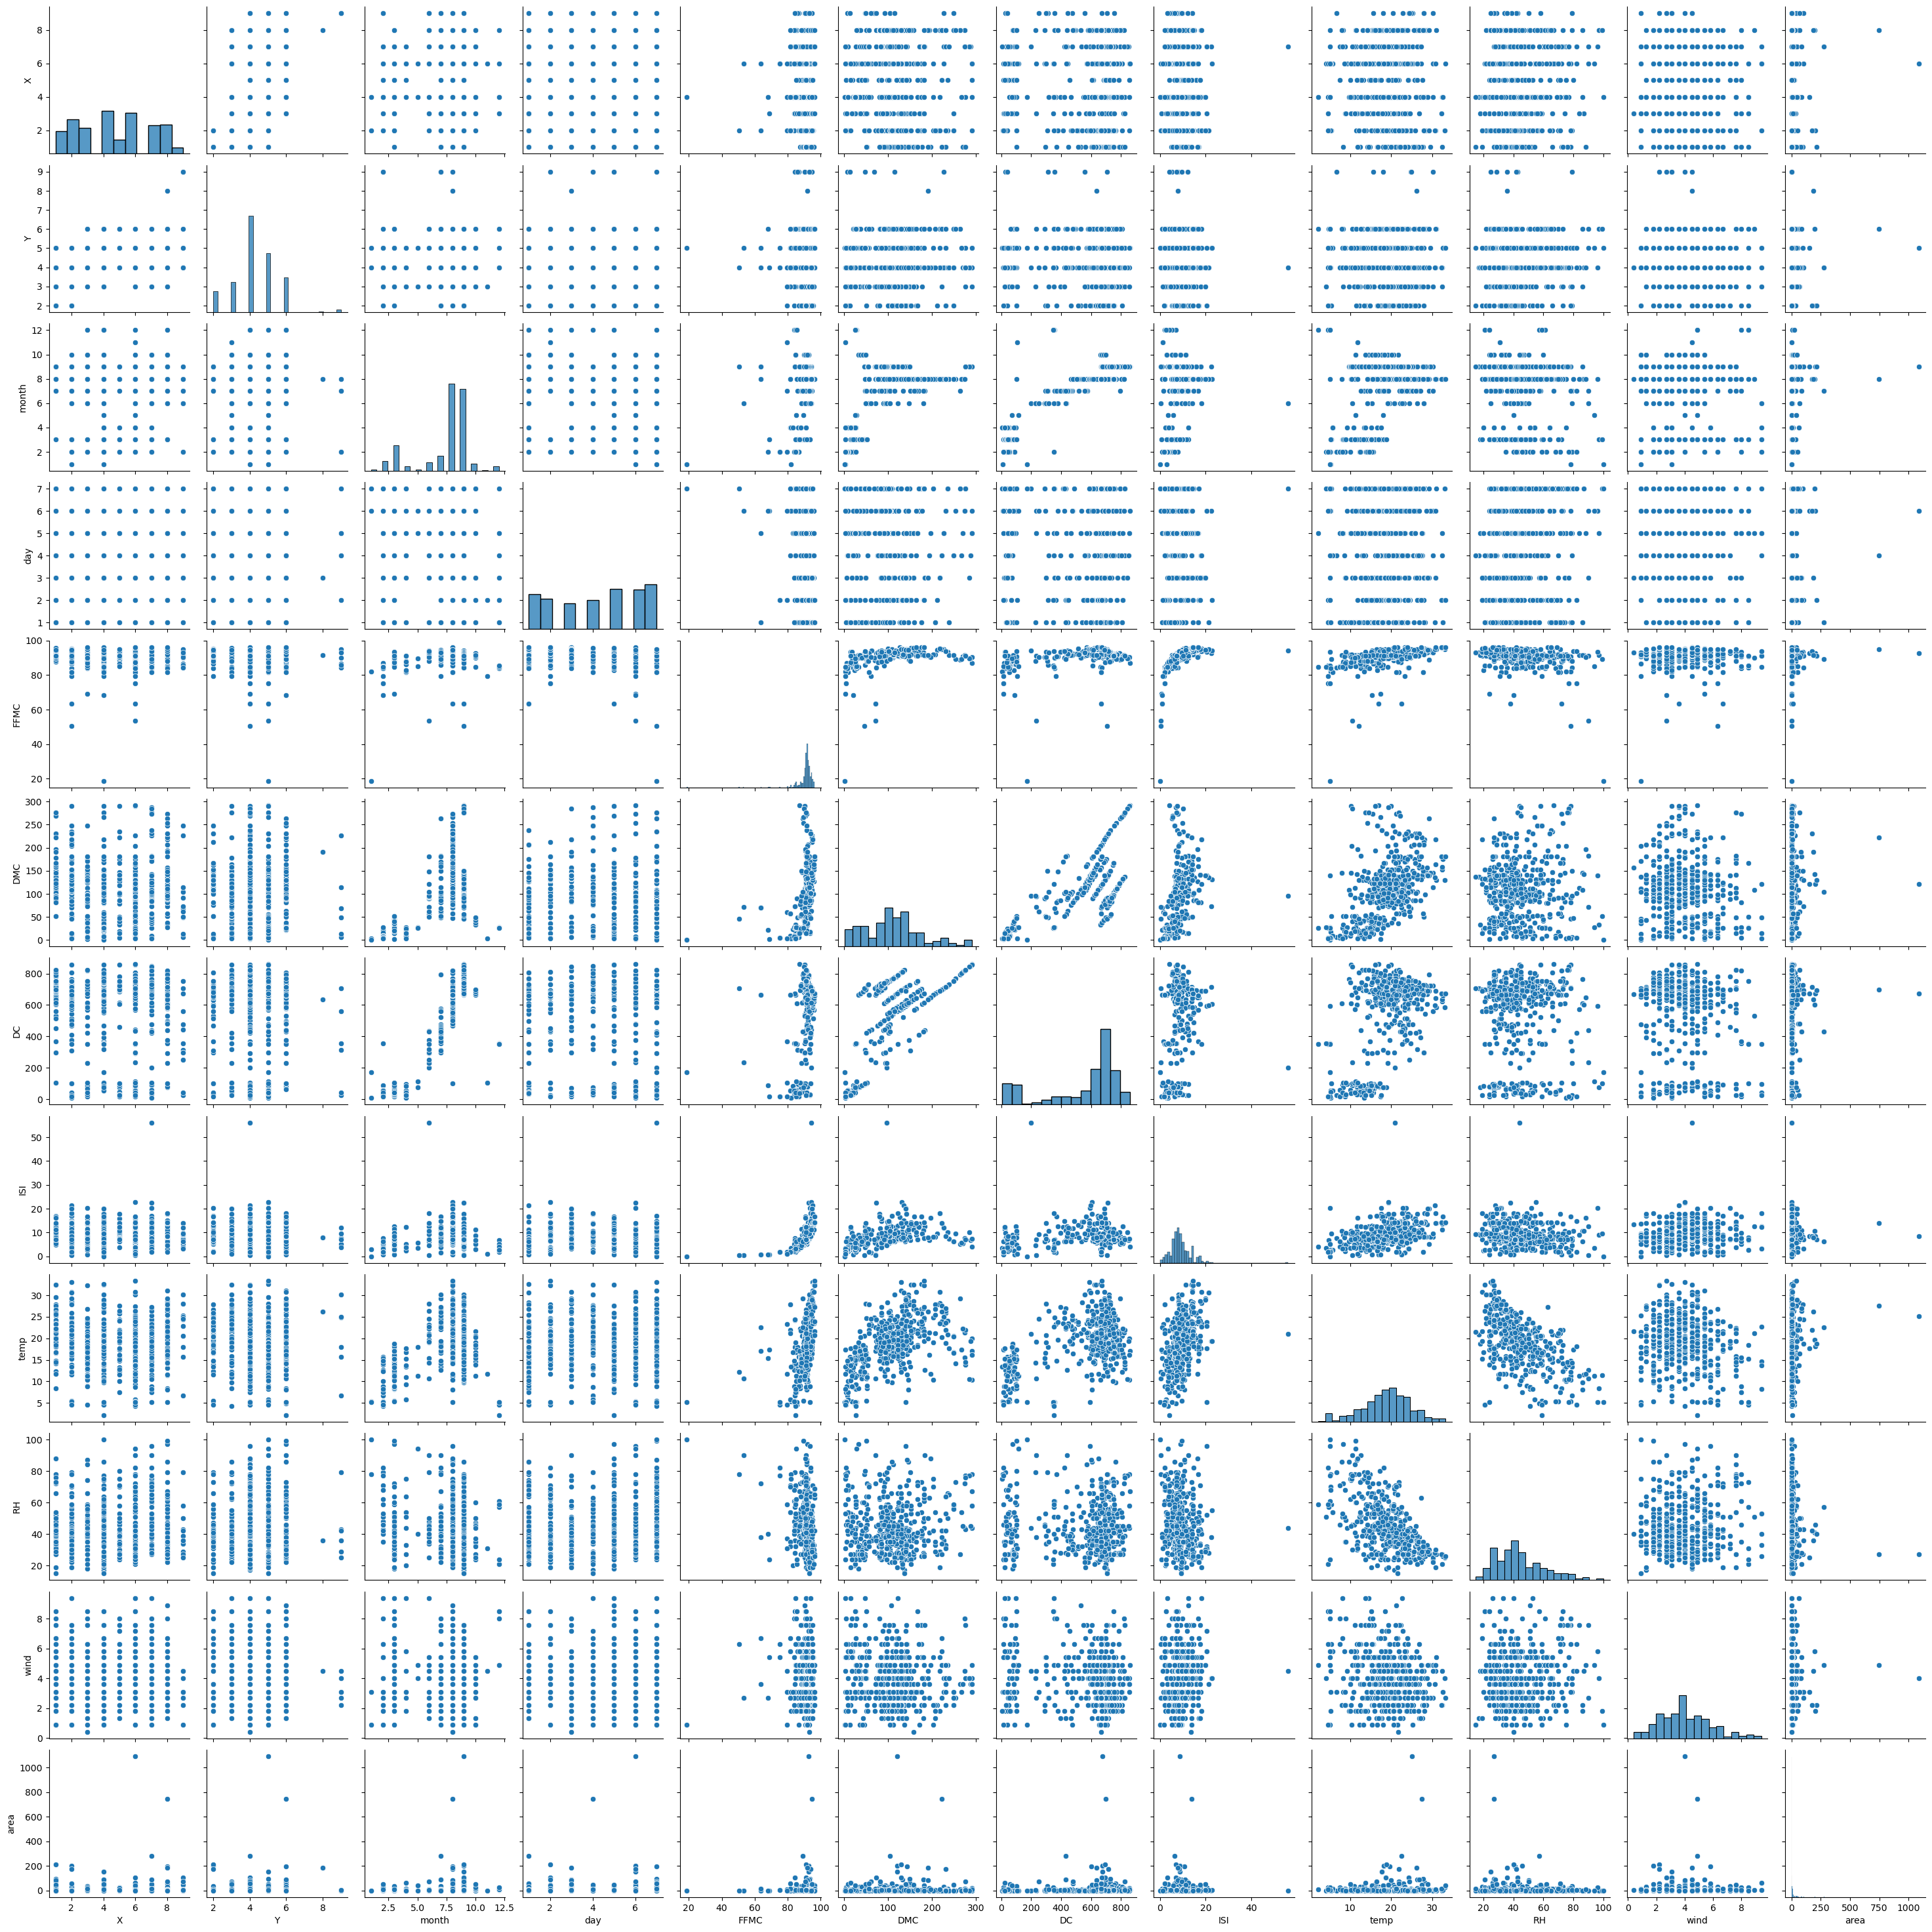

In [12]:
# check the correlation between the features
sns.pairplot(df_forestfires)

### Interpretation of Correlation Analysis

- There is a high correlation between the time of year (month) and the parameters FFMC, DMC, DC, and temperature, which is expected.
- FFMC and ISI are highly correlated AND have similar input characteristics.
- DC and temperature are correlated, as temperature influences the DC value.
- DMC and temperature are correlated, as temperature influences the DMC value.
- DC and DMC are higly correlated, it use almost identical inputs for the index creation

<Axes: >

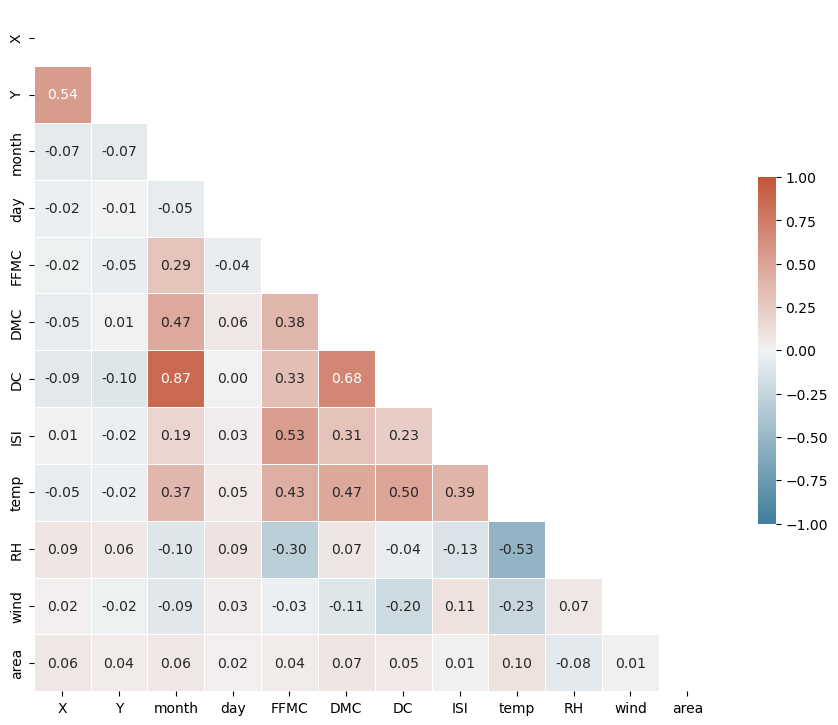

In [13]:
# BASED ON: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = df_forestfires.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")


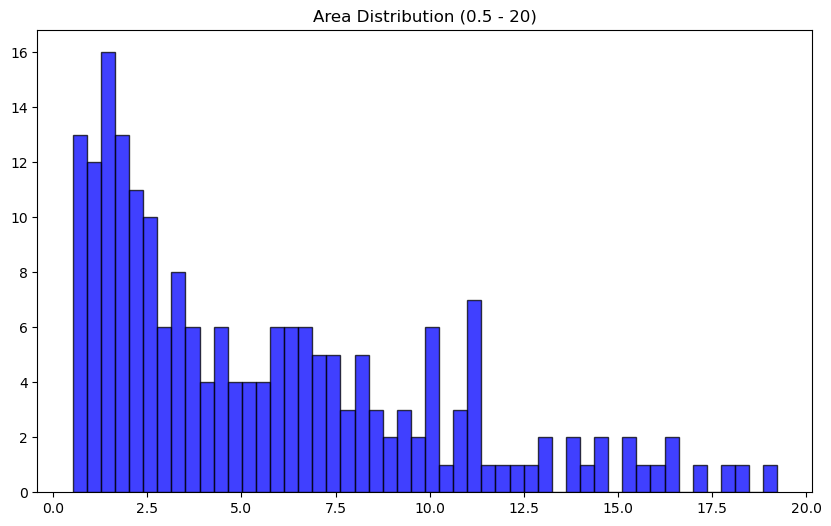

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_forestfires[(df_forestfires['area'] >= 0.5) & (df_forestfires['area'] <= 20)]['area'], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Area Distribution (0.5 - 20)')
plt.show()

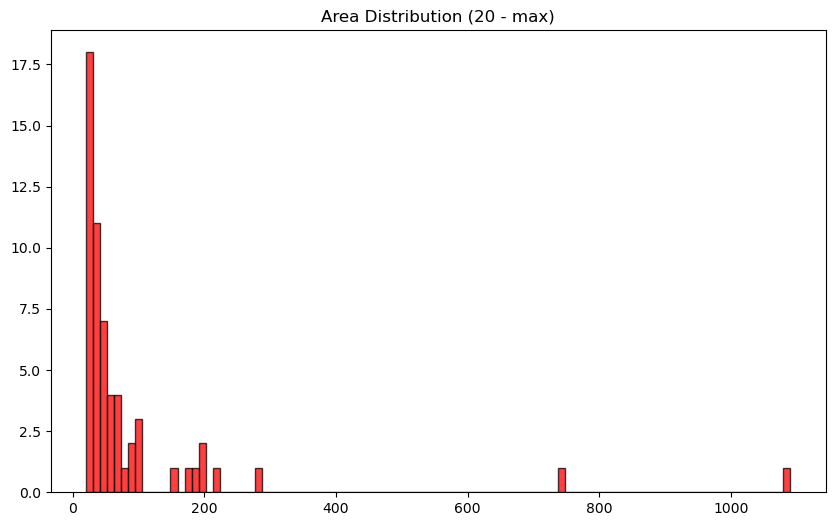

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_forestfires[(df_forestfires>= 20)]['area'], bins=100, alpha=0.75, color='red', edgecolor='black')
plt.title('Area Distribution (20 - max)')
plt.show()

### Use stratified sampling to create train and test subdatasets:
Since the predicted variable in the dataset is highly heterogeneous and most records consist of small fires, it is necessary to apply stratified sampling for training the model. A total of five quantile classes have been defined. Records with a burned area of 0 will not be considered, since I cann't determine whether no event occurred or if data about the burned area is missing.

<Axes: >

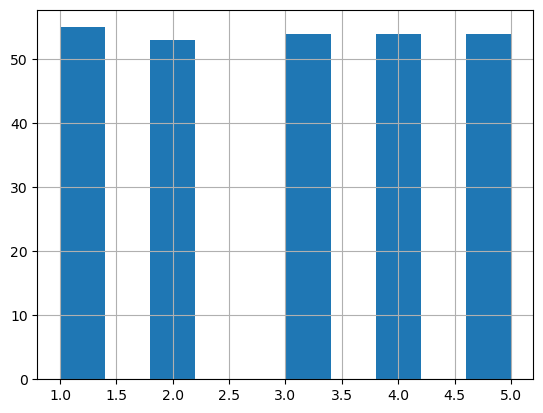

In [16]:
df_forestfires_nzero = df_forestfires[df_forestfires["area"] > 0]
df_forestfires["area_cat"] = pd.NA
df_forestfires.loc[df_forestfires_nzero.index, "area_cat"] = pd.qcut(df_forestfires_nzero["area"], q=5, labels=[1, 2, 3, 4, 5])
df_forestfires["area_cat"].hist()

In [17]:
df_forestfires = df_forestfires.dropna(subset=['area_cat'])

In [18]:
df_forestfires["area_cat"].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [19]:
df_forestfires = df_forestfires.reset_index(drop=True)
df_forestfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area,area_cat
0,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.36,1
1,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0.43,1
2,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0.47,1
3,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.55,1
4,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,5,4,8,5,91.0,166.9,752.6,7.1,21.1,71,7.6,2.17,2
266,6,5,8,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.43,1
267,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,6.44,3
268,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,54.29,5


In [ ]:
print(df_forestfires['rain'].unique())
df_forestfires.drop(columns=['rain'], inplace=True)

[0.  0.2 1.  6.4 0.8 0.4 1.4]


While training the model, I struggled getting good results. I think the main reason is that the burned area values are very unbalanced — there are many small numbers (small burned areas) and only a few very large ones. Stratified selection did not solve the problem. To get better results from the selected model I tried using a logarithmic transformation on the target variable to reduce the difference between small and large values it significantly helped to train better model.

Since the dataset is very small, I decided to use 80% of the original dataset for training the model.

In [31]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

r2_scores = []
mae_scores = []
mse_scores = []

for train_index, test_index in sss.split(df_forestfires, df_forestfires["area_cat"]):
    strat_train_set = df_forestfires.loc[train_index]
    strat_test_set = df_forestfires.loc[test_index]

    X_train = strat_train_set.drop(columns=["area", "area_cat"])
    y_train = strat_train_set["area"]
    X_test = strat_test_set.drop(columns=["area", "area_cat"])
    y_test = strat_test_set["area"]

    # Apply log1p only for model training
    y_train_log = np.log1p(y_train)

    forest_reg = RandomForestRegressor(random_state=42)
    hyperparameter_space = {
        'n_estimators': [5, 20, 50, 100, 150, 200],
        'max_depth': [10, 15, 20, 25, 30, 35, 50, 100],
        'min_samples_leaf': [2, 4, 6, 8, 10]
    }

    gs = GridSearchCV(forest_reg, param_grid=hyperparameter_space, n_jobs=-1, verbose=2,
                      scoring="neg_mean_absolute_error", cv=10, return_train_score=True)

    gs.fit(X_train, y_train_log)
    print("Best parameters:", gs.best_params_)

    final_model = gs.best_estimator_

    # Predict in log space and transform back
    y_pred_log = final_model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    # Evaluate on original (non-log) values
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    tree_mae = mean_absolute_error(y_test, y_pred)
    print(f'Median relative error: {round(tree_mae / y_train.median() * 100., 2)} %')

    print(f'Final model testing MAE: {mae}')
    print('---')
# Feature importance
feature_importances = pd.Series(final_model.feature_importances_, index=X_train.columns)
print("Feature importances:")
print(feature_importances.sort_values(ascending=False))

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 50}
Median relative error: 262.42 %
Final model testing MAE: 16.610923206565364
---
Feature importances:
temp     0.157816
RH       0.152055
DMC      0.150523
ISI      0.130088
FFMC     0.118469
wind     0.089452
X        0.064265
DC       0.061362
day      0.037980
Y        0.027553
month    0.010436
dtype: float64


c:\Python\Python312\envs\IF_HydroSim\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
